In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

def geoid2code(geoid):
    return int(geoid[4:])

# this data set has cumulative stats
nyt_github_covid_rolling_avg = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties.csv'
df = pd.read_csv(nyt_github_covid_rolling_avg,converters=dict(geoid=geoid2code))
df.rename(columns={'geoid': 'GEOID'},inplace=True)

start, end = datetime.fromisoformat(df['date'].min()),datetime.fromisoformat(df['date'].max())

In [ ]:
# To simplify things Ive copied it here, uncompressed,
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/2021_Gaz_counties_national.txt'
# The file uses tabs, not "," as a separator.  `pd.read_csv` still works if you 
codes = pd.read_csv(url,sep='\t')
# last column name misparsed, many spaces added.  data cleanup
long = codes.columns[-1]
codes.rename(columns={long: long.strip()},inplace=True)
#Make the subtable we're going to join to.
geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]

In [ ]:
all_data = df.join(geoid_lat_long.set_index('GEOID'),on='GEOID')

In [ ]:
all_data

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455
...,...,...,...,...,...,...,...,...,...,...,...,...
1774199,2021-09-29,69120,Tinian,Northern Mariana Islands,0,0.00,0.00,0,0.00,0.00,NaN,NaN
1774200,2021-09-29,69110,Saipan,Northern Mariana Islands,0,0.43,0.89,0,0.00,0.00,NaN,NaN
1774201,2021-09-29,78030,St. Thomas,Virgin Islands,7,5.00,9.68,1,0.14,0.28,NaN,NaN
1774202,2021-09-29,78020,St. John,Virgin Islands,0,0.86,20.55,0,0.00,0.00,NaN,NaN


In [ ]:
#cty_list = ['Pima County','Gila County','Pinal County']
#final_df = new_df[new_df['county'].isin(cty_list)]

In [ ]:
#lat_nan_chk=pd.isnull(final_df['INTPTLAT'])
#lon_nan_chk=pd.isnull(final_df['INTPTLONG'])
#sum(lat_nan_chk)#26323
#sum(lon_nan_chk)#26323
#print(final_df[lat_nan_chk])##to see if there are any NANs in Latitude 
#print(final_df[lat_nan_chk])##to see if there are any NANs in Longitude 

In [ ]:
all_data.count() 

date                   1774204
GEOID                  1774204
county                 1774204
state                  1774204
cases                  1774204
cases_avg              1774204
cases_avg_per_100k     1753434
deaths                 1774204
deaths_avg             1774204
deaths_avg_per_100k    1753434
INTPTLAT               1747881
INTPTLONG              1747881
dtype: int64

In [ ]:
final_df = all_data.dropna()

In [ ]:
final_df.count()

date                   1747881
GEOID                  1747881
county                 1747881
state                  1747881
cases                  1747881
cases_avg              1747881
cases_avg_per_100k     1747881
deaths                 1747881
deaths_avg             1747881
deaths_avg_per_100k    1747881
INTPTLAT               1747881
INTPTLONG              1747881
dtype: int64

In [ ]:
final_df

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455
...,...,...,...,...,...,...,...,...,...,...,...,...
1774193,2021-09-29,1009,Blount,Alabama,23,34.57,59.79,0,1.14,1.98,33.977358,-86.566440
1774194,2021-09-29,1007,Bibb,Alabama,14,15.71,70.17,0,0.43,1.91,33.015893,-87.127148
1774195,2021-09-29,1005,Barbour,Alabama,2,9.14,37.04,0,0.29,1.16,31.870253,-85.405104
1774196,2021-09-29,1003,Baldwin,Alabama,57,66.14,29.63,4,3.71,1.66,30.659218,-87.746067


In [ ]:
final_df["year"]=pd.DatetimeIndex(final_df["date"]).year
final_df["month"]=pd.DatetimeIndex(final_df["date"]).month
#ny2020_6=final_df.loc[(final_df["year"]==2020) & (final_df["month"]==6)]
#ny2020_7=final_df.loc[(final_df["year"]==2020) & (final_df["month"]==7)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
final_df.to_csv("full_data.csv")

In [ ]:
us_only_df = final_df.loc[(final_df["INTPTLONG"]<178) & (final_df["INTPTLONG"]>-130)]

In [ ]:
us_only_df#1733002 

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG,year,month
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774193,2021-09-29,1009,Blount,Alabama,23,34.57,59.79,0,1.14,1.98,33.977358,-86.566440,2021,9
1774194,2021-09-29,1007,Bibb,Alabama,14,15.71,70.17,0,0.43,1.91,33.015893,-87.127148,2021,9
1774195,2021-09-29,1005,Barbour,Alabama,2,9.14,37.04,0,0.29,1.16,31.870253,-85.405104,2021,9
1774196,2021-09-29,1003,Baldwin,Alabama,57,66.14,29.63,4,3.71,1.66,30.659218,-87.746067,2021,9


In [ ]:
df_2020=us_only_df.loc[(us_only_df["year"]==2020)]
#df=df_2020.groupby(['state','month']).mean()

In [ ]:
log_c  = np.log(1+ df_2020["cases"])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_2020.to_csv("df_2020.csv")

In [ ]:
df_2020 #count is 867770

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG,year,month
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.00,0.00,48.054913,-121.765038,2020,1
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.00,0.00,41.894294,-87.645455,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888544,2020-12-31,1009,Blount,Alabama,57,33.71,58.30,0,0.71,1.24,33.977358,-86.566440,2020,12
888545,2020-12-31,1007,Bibb,Alabama,17,17.57,78.46,0,0.57,2.55,33.015893,-87.127148,2020,12
888546,2020-12-31,1005,Barbour,Alabama,22,17.71,71.76,0,0.00,0.00,31.870253,-85.405104,2020,12
888547,2020-12-31,1003,Baldwin,Alabama,209,154.29,69.11,1,1.43,0.64,30.659218,-87.746067,2020,12


In [ ]:
from google.colab import drive
import os.path
# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive')
# Specify the data dir in the new filesystem.
data_dir ='/content/gdrive/Shared drives/shapefiles/admin_areas'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! pip install Basemap
import pandas as pd
import os.path
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


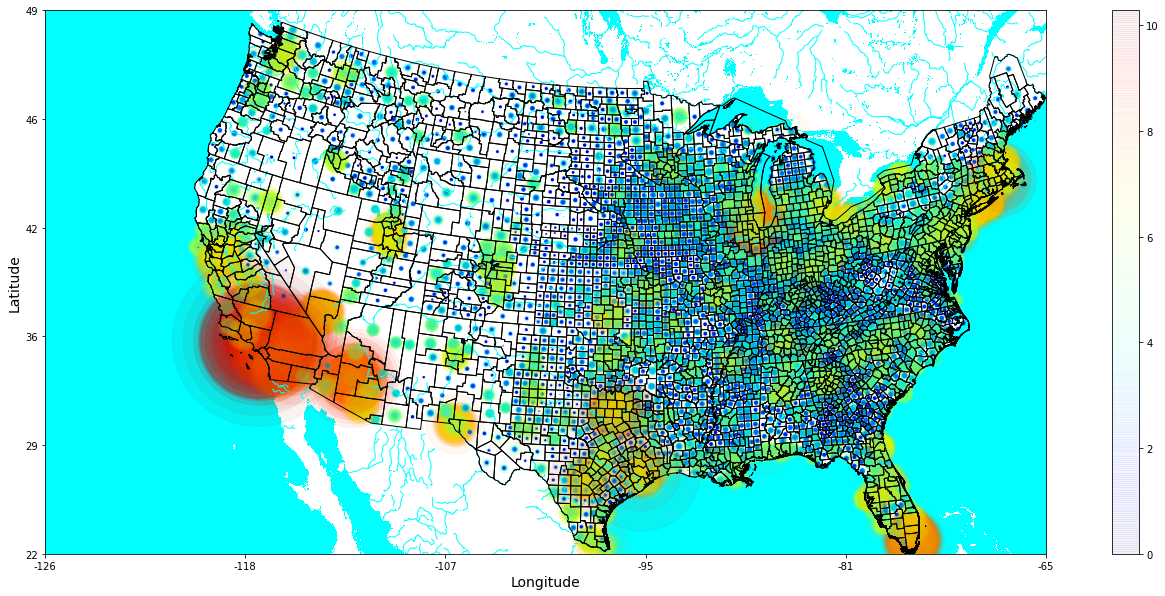

In [ ]:
data_dir ='/content/gdrive/Shared drives/shapefiles/admin_areas'
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-126.45 ,22.45,-64.63,48.60)
#HEIGHT/WIDTH
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
map = Basemap(resolution='i', projection='tmerc',
              llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
              urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
              lon_0=lon_0, lat_0=lat_0)
map.drawlsmask(land_color='white',ocean_color='aqua',lakes=True,resolution='f', grid=1.25)
# Draw counties using a basic basemap method.
countyborderwidth,stateborderwidth = (1,2)
#map.drawstates(linewidth=stateborderwidth)
#map.drawcountries(linewidth=stateborderwidth)
map.drawrivers(color='aqua',linewidth=1)
collection = map.scatter(df_2020.INTPTLONG.values, df_2020.INTPTLAT.values,s = df_2020['cases'].values, c=log_c, cmap=plt.get_cmap("jet"),alpha=0.05,latlon=True)
cbar = fig.colorbar(collection)
map.readshapefile(os.path.join(data_dir, "USA_adm2"),"counties", linewidth=countyborderwidth)
#####################################################################
# Set labels on x- and y- axes.
llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
# 6 evenly spaced ticks on each axis.
xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)# Use `map` as a function to get from latlongs to map coords. 
ax.set_xticks(xt)
ax.set_yticks(yt)
#  The next two lines are surely the hardest part, setting the lat/long ticks displayed 
#  on the x and y axes.  It requires going FROM axis coords TO Lat longs using `map` as
# function again (but with the `inverse` keyword).
ax.set_xticklabels([int(round(list(map(v,yt[i],inverse=True))[0])) for (i,v) in enumerate(xt)])
ax.set_yticklabels([int(round(list(map(xt[i],v,inverse=True))[1])) for (i,v) in enumerate(yt)])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


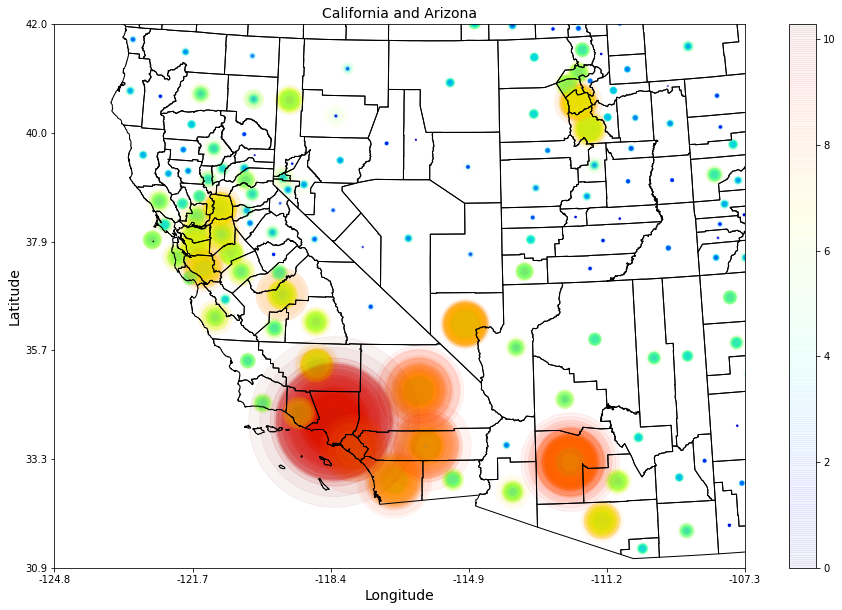

In [ ]:
import os.path
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# Compare CA and Arizona
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-122.8, 37., -122., 38.)


#HEIGHT/WIDTH
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.8,30.94,-107.29,42)
aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
# Use this number for scaling the figure.  You want to keep the aspect constant
fig_width = 10
fig = plt.figure(figsize=(fig_width/aspect,fig_width))
ax = plt.subplot(111)
lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
map = Basemap(resolution='i', projection='tmerc',
              llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
              urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
              lon_0=lon_0, lat_0=lat_0)

collection = map.scatter(df_2020.INTPTLONG.values, df_2020.INTPTLAT.values, 
                 s = df_2020['cases'].values,
                 c=log_c, cmap=plt.get_cmap("jet"),
                 alpha=0.05,latlon=True
                      )
cbar = fig.colorbar(collection)
#Alternatively do counties with shapefile
map.readshapefile(os.path.join(data_dir, "USA_adm2"),"counties", linewidth=countyborderwidth)

#####################################################################
# Set labels on x- and y- axes.
# Use map as a function from lat/long  to coords in thios projection
llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
# 6 evenly spaced ticks on each axis.
xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.set_xticklabels(['{0:.1f}'.format(list(map(v,yt[i],inverse=True))[0]) 
                    for (i,v) in enumerate(xt)])
ax.set_yticklabels(['{0:.1f}'.format(list(map(xt[i],v,inverse=True))[1]) 
                    for (i,v) in enumerate(yt)])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('California and Arizona', fontsize=14)
plt.show()

In [ ]:
df_2020 = df_2020.sort_values(by="month")

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


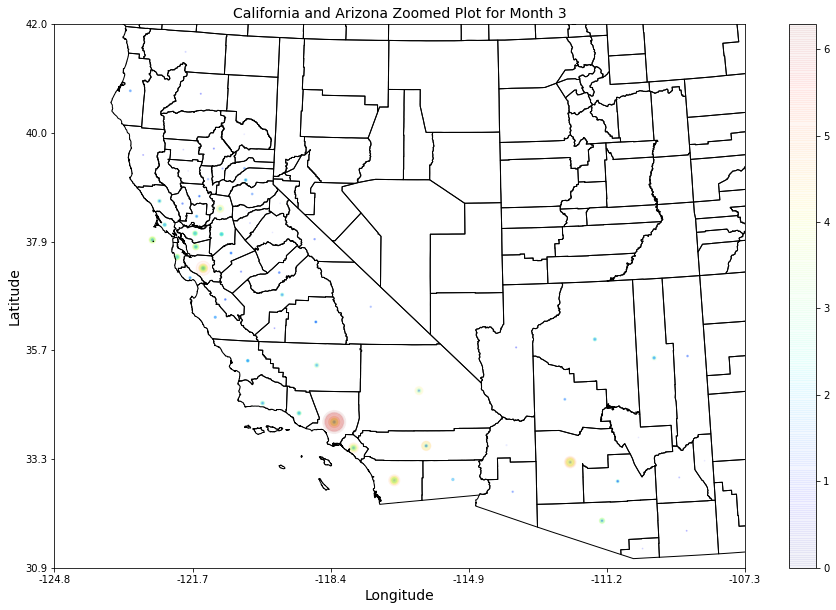

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


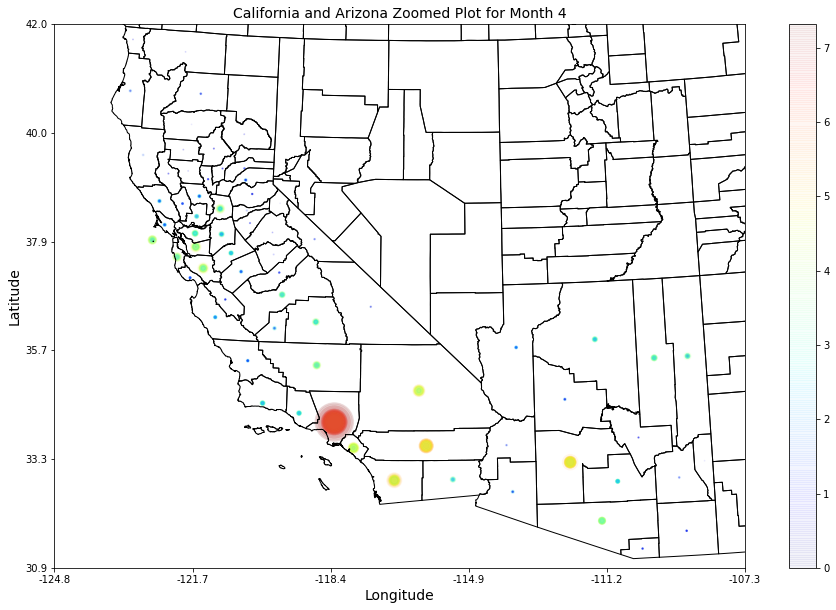

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


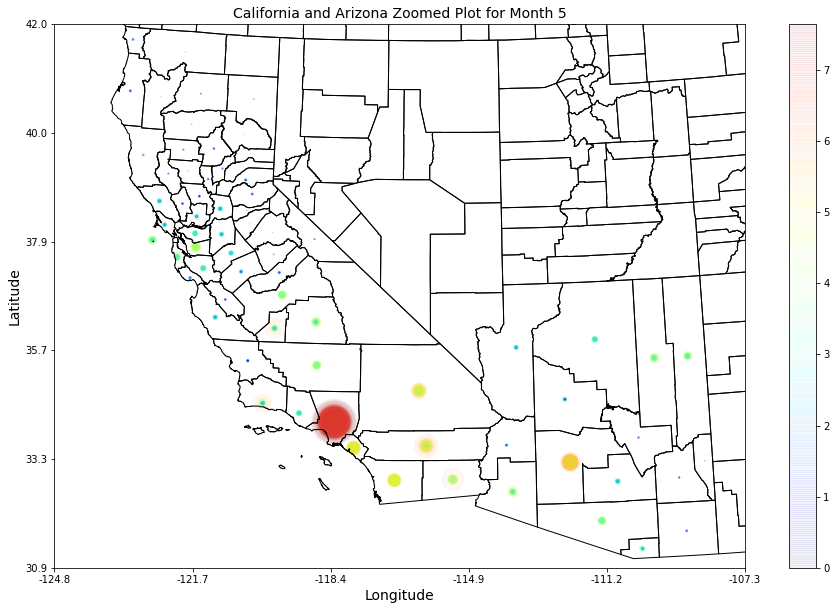

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


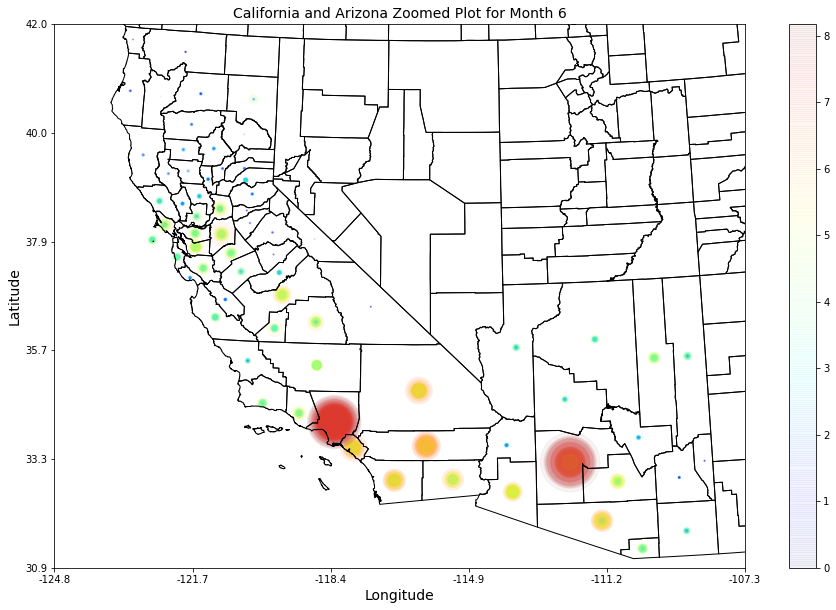

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


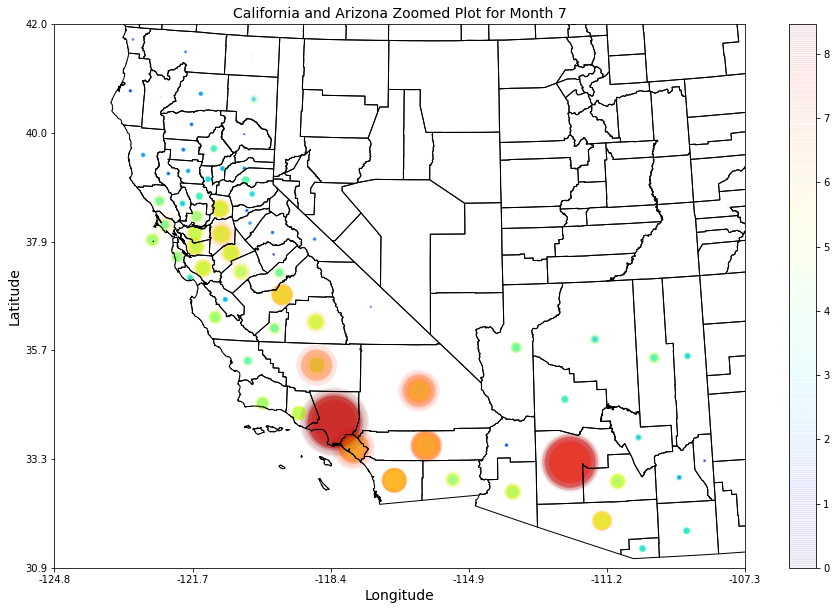

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


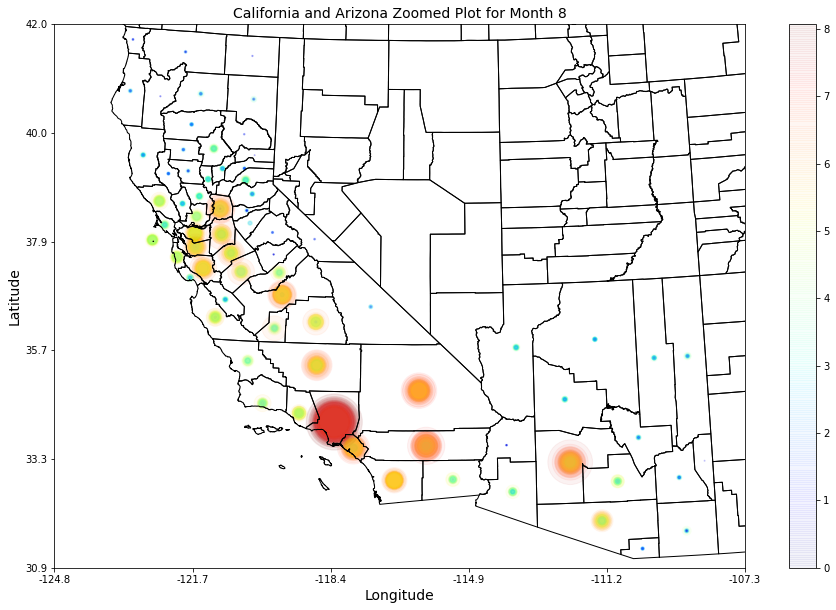

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


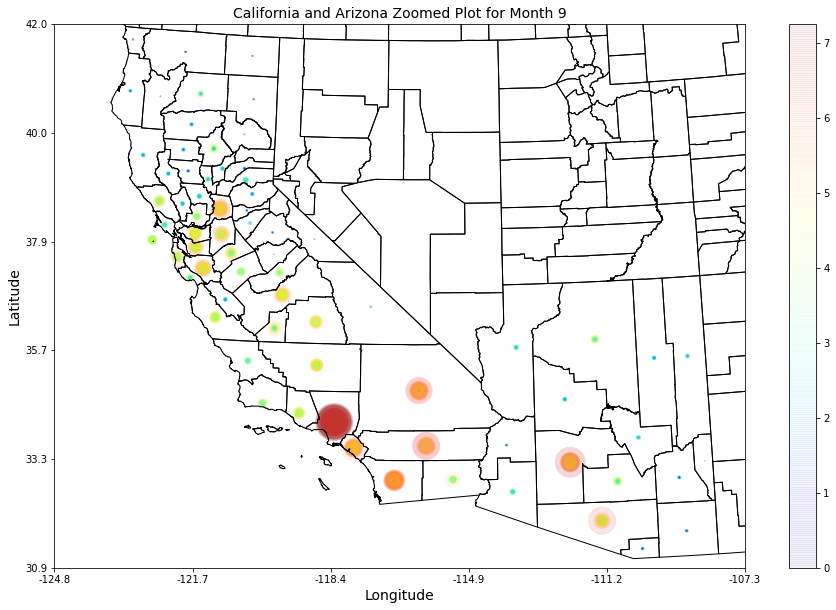

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


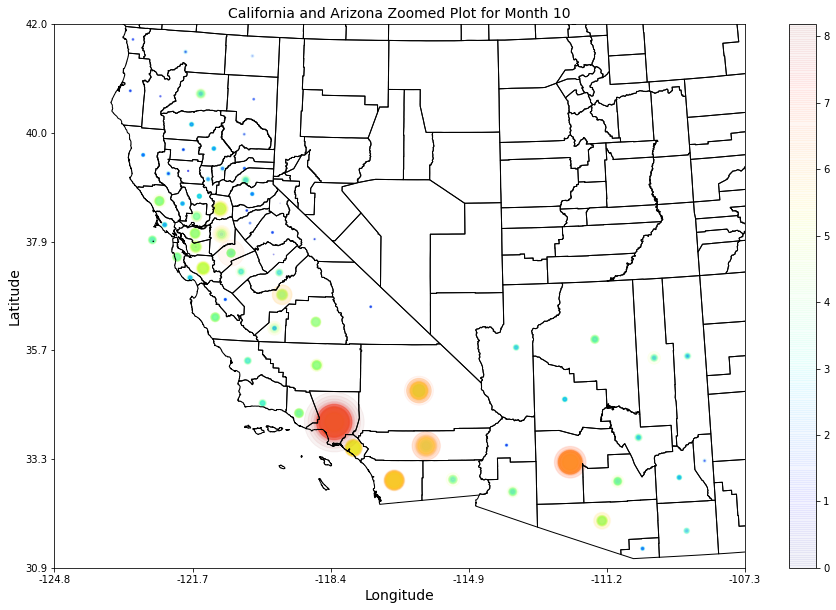

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


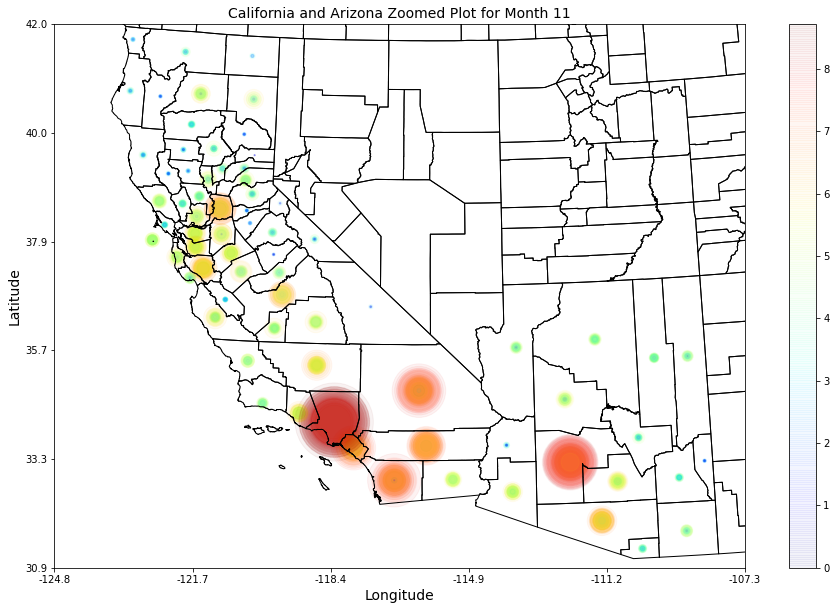

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


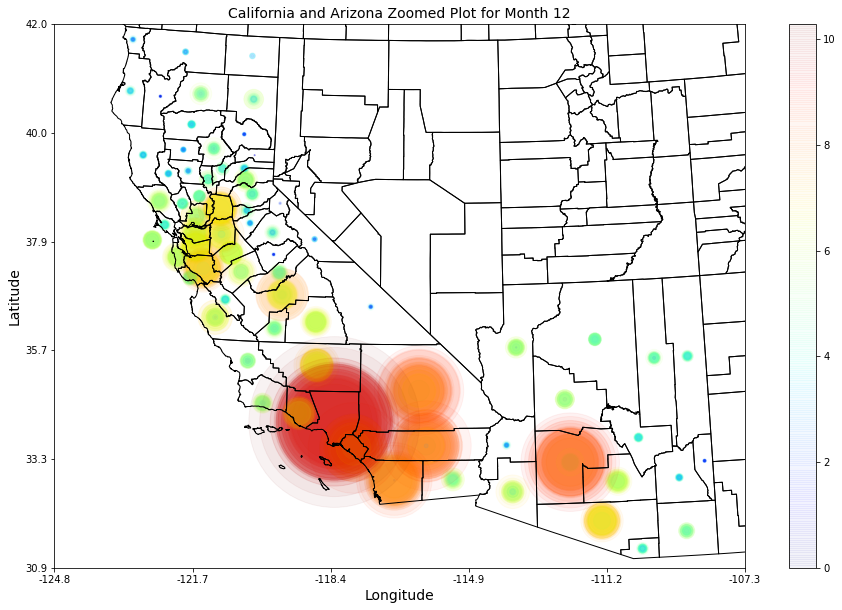

In [ ]:
my_list = list(set(df_2020["month"]))
for i in my_list[2:13]:
    monthly_df = pd.DataFrame(df_2020.loc[(df_2020["month"]==i) & ((df_2020["state"]=='California') | (df_2020["state"]=='Arizona'))])
    log_c  = np.log(1+ monthly_df["cases"])
    llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat=(-124.8,30.94,-107.29,42)
    aspect = (urcrnrlat-llcrnrlat)/(urcrnrlon-llcrnrlon)
    # Use this number for scaling the figure.  You want to keep the aspect constant
    fig_width = 10
    fig = plt.figure(figsize=(fig_width/aspect,fig_width))
    ax = plt.subplot(111)
    lat_0,lon_0 = (llcrnrlat + urcrnrlat)/2.,(llcrnrlon + urcrnrlon)/2.
    map = Basemap(resolution='i', projection='tmerc',
                llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
                urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
                lon_0=lon_0, lat_0=lat_0)

    collection = map.scatter(monthly_df.INTPTLONG.values, monthly_df.INTPTLAT.values, 
                    s = monthly_df['cases'].values,
                    c=log_c, cmap=plt.get_cmap("jet"),
                    alpha=0.05,latlon=True
                        )
    cbar = fig.colorbar(collection)
    #Alternatively do counties with shapefile
    map.readshapefile(os.path.join(data_dir, "USA_adm2"),"counties", linewidth=countyborderwidth)
    #####################################################################
    # Set labels on x- and y- axes.
    # Use map as a function from lat/long  to coords in thios projection
    llcrnr_coords = list(map(llcrnrlon,llcrnrlat))
    urcrnr_coords = list(map(urcrnrlon,urcrnrlat))
    # 6 evenly spaced ticks on each axis.
    xt = np.linspace(llcrnr_coords[0],urcrnr_coords[0],6)
    yt = np.linspace(llcrnr_coords[1],urcrnr_coords[1],6)
    ax.set_xticks(xt)
    ax.set_yticks(yt)
    ax.set_xticklabels(['{0:.1f}'.format(list(map(v,yt[i],inverse=True))[0]) 
                        for (i,v) in enumerate(xt)])
    ax.set_yticklabels(['{0:.1f}'.format(list(map(xt[i],v,inverse=True))[1]) 
                        for (i,v) in enumerate(yt)])
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    plt.title('California and Arizona Zoomed Plot for Month '+ str(i), fontsize=14)
    plt.show()    